In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/telecom_churn.csv


<h1> Machine Learninng </h1>

In [2]:
df = pd.read_csv("../input/telecom-churn/telecom_churn.csv")

In [3]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [4]:
df.isnull().any()

Churn              False
AccountWeeks       False
ContractRenewal    False
DataPlan           False
DataUsage          False
CustServCalls      False
DayMins            False
DayCalls           False
MonthlyCharge      False
OverageFee         False
RoamMins           False
dtype: bool

In [5]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


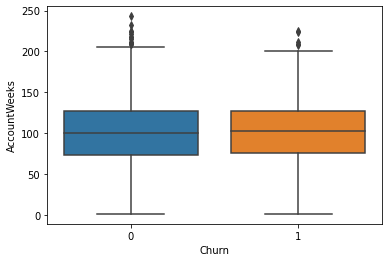

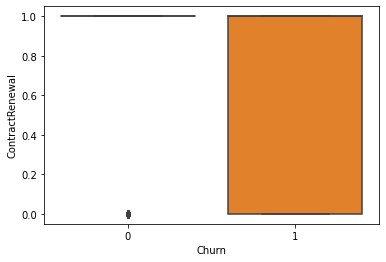

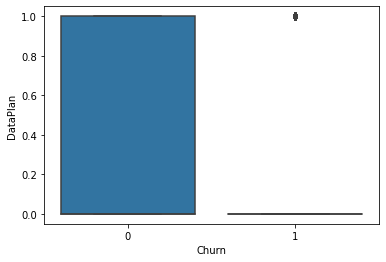

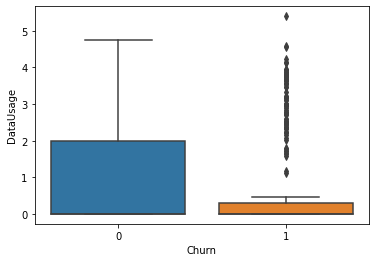

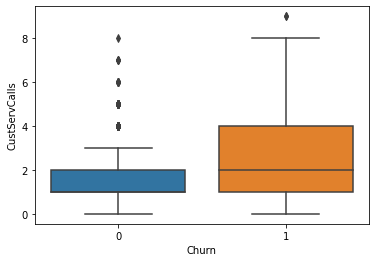

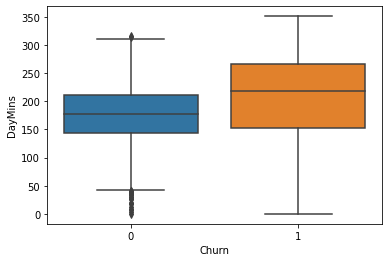

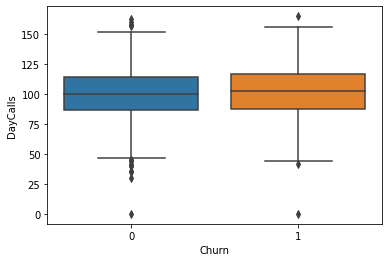

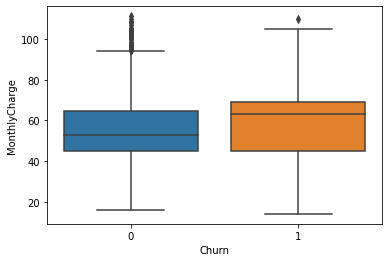

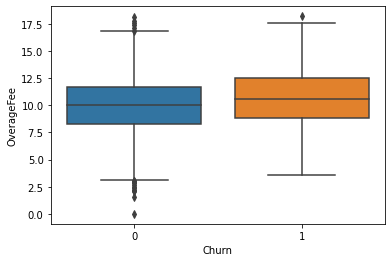

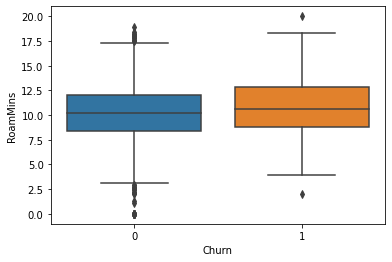

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical=list(df.columns)
categorical.remove('Churn')
for i in categorical:
    plt.figure()
    sns.boxplot(x='Churn',y=i,data=df)

<AxesSubplot:>

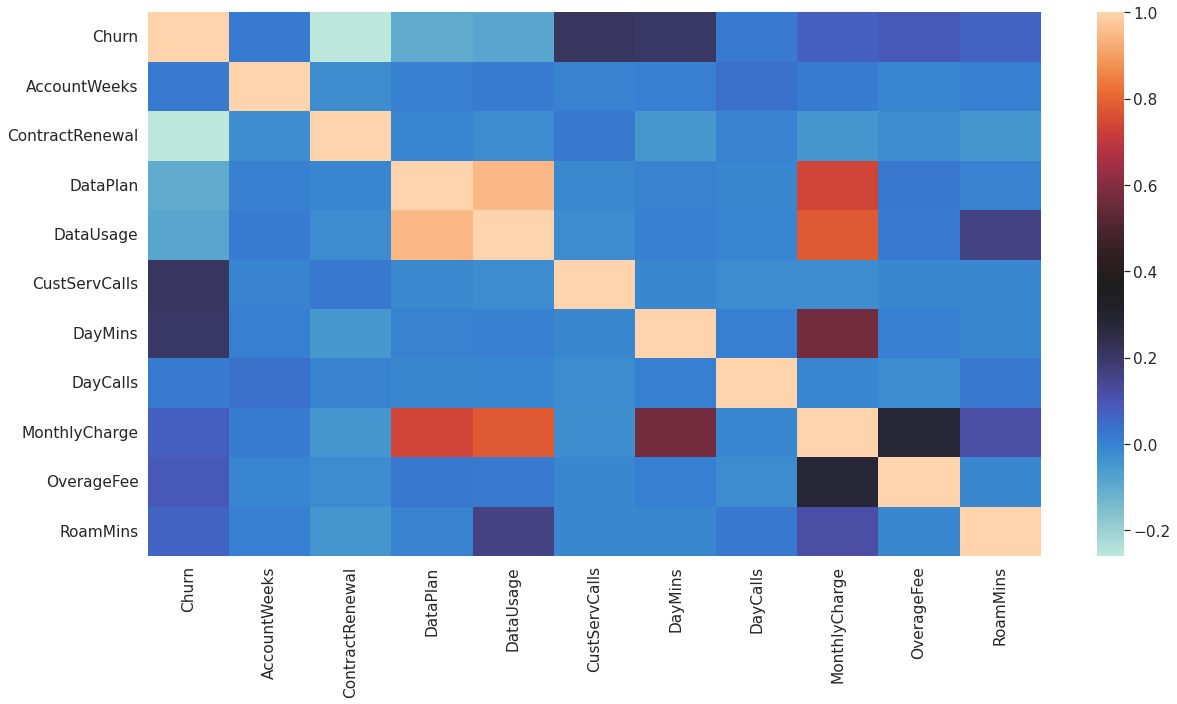

In [7]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), cmap = sns.color_palette("icefire", as_cmap=True))

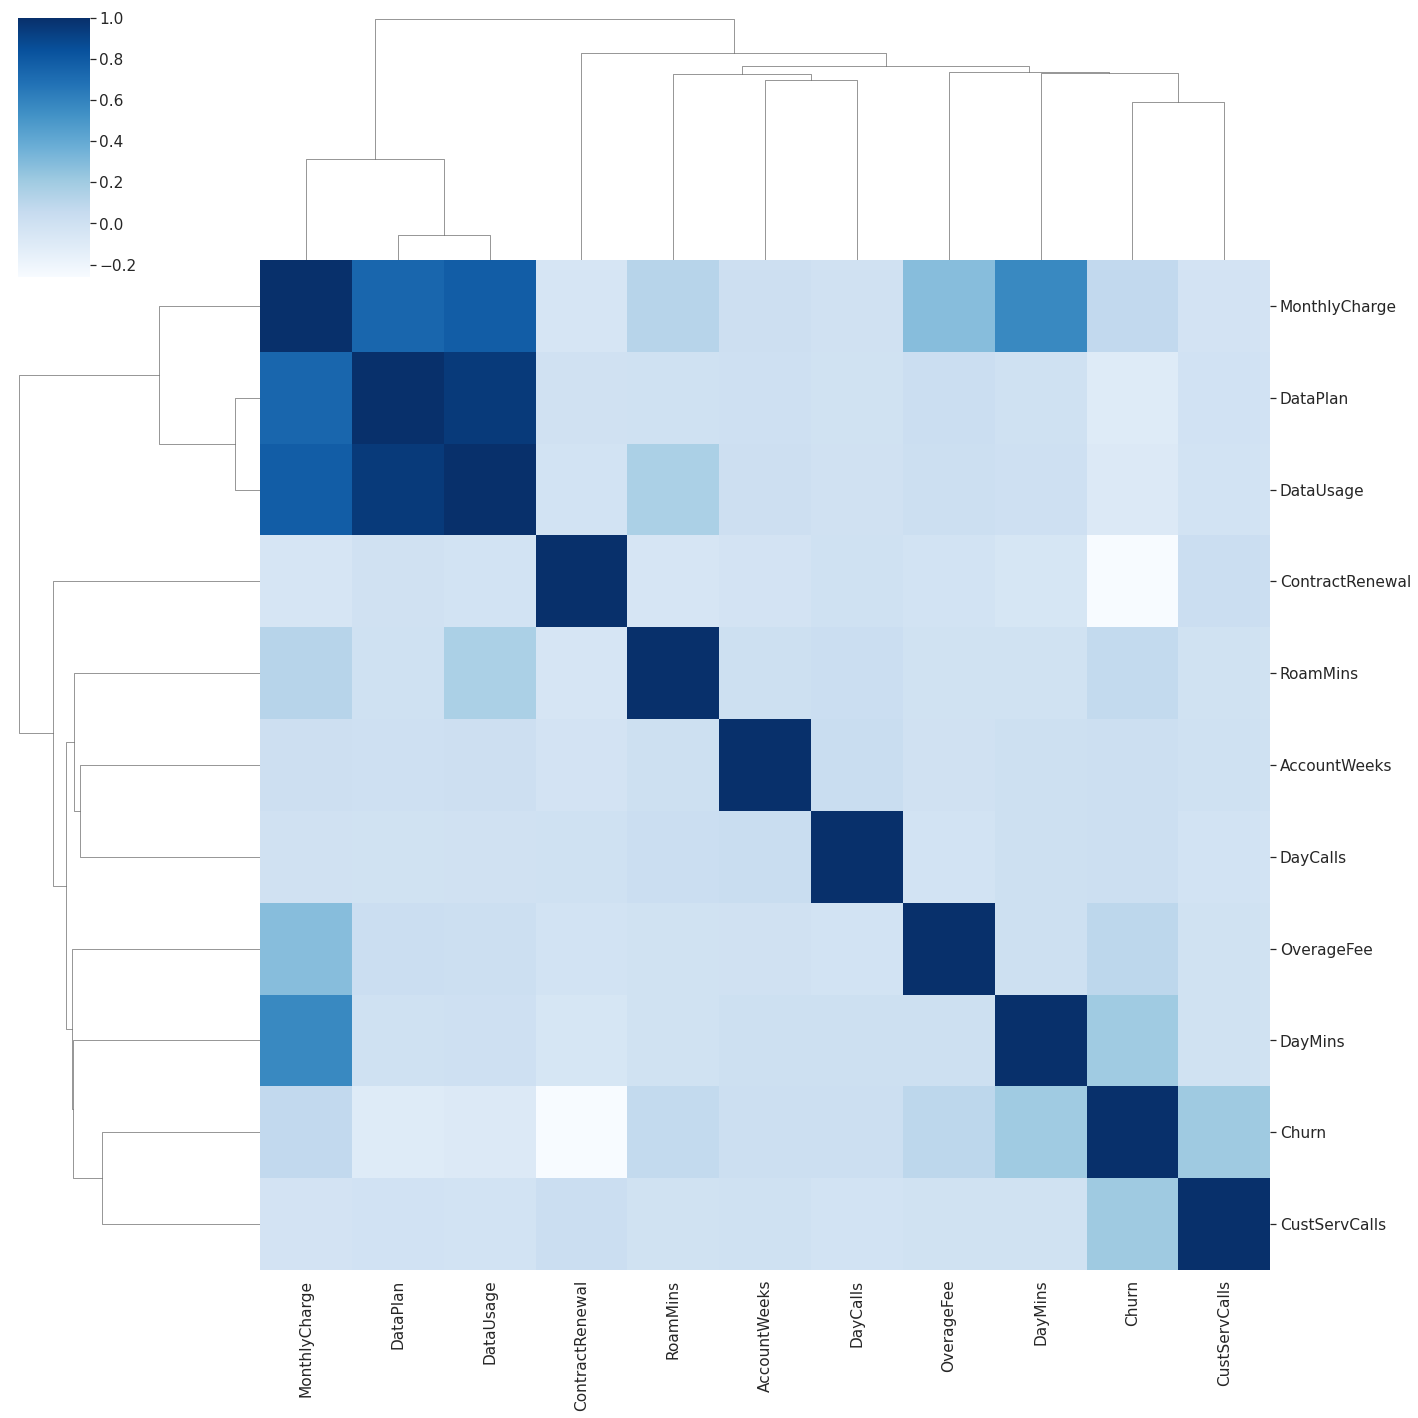

In [8]:
sns.set(font_scale=1.4)
sns.clustermap(data=df.corr(), cmap="Blues", figsize=(20,20), yticklabels=True)

In [9]:
check = df.duplicated(keep='first')
sum(check)

0

In [10]:
Xall = df.drop('Churn', axis = 1)
yall = df['Churn']

In [11]:
Xall

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [12]:
np.unique(yall)

array([0, 1])

In [13]:
np.sum(yall)

483

In [14]:
np.sum(1-yall)

2850

In [15]:
2850 / (2850+483)

0.8550855085508551

In [16]:
from sklearn.model_selection import train_test_split
X, Xt, y, yt = train_test_split(Xall, yall, test_size = 0.2, random_state=0)

In [17]:
X.shape

(2666, 10)

In [18]:
Xt.shape

(667, 10)

In [19]:
df = pd.DataFrame({
    'Positive': [sum(y), sum(yt)],
    'Negative': [sum(1-y), sum(1-yt)]
}, index=['Train', 'Test'])
df

,Positive,Negative
Train,395,2271
Test,88,579


<AxesSubplot:>

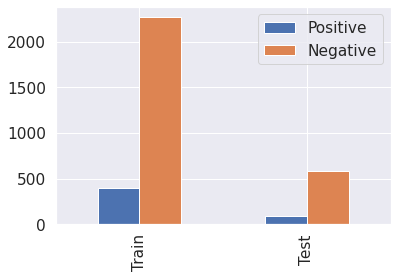

In [20]:
df.plot(y=["Positive", "Negative"], kind="bar")

<AxesSubplot:ylabel='Positive'>

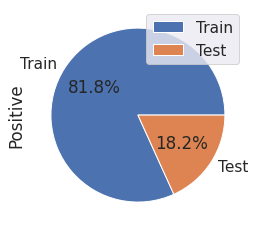

In [21]:
df.plot(y='Positive', kind="pie", autopct='%1.1f%%')

<h1> Normalization </h1>

In [22]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler().fit(X)
X = scl.transform(X)
Xt = scl.transform(Xt)

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
param = [1,2,4,8,16,32]
allyp = [cross_val_predict(SVC(C=item,random_state=0), X, y, cv=5) for item in param]
train_acc = [sum(item==y)/len(y) for item in allyp]
i_best = np.argmax(train_acc)
best_param = param[i_best]
best_acc = train_acc[i_best]
print("Train Acc = " + str(best_acc) + ", C = "+ str(best_param))

Train Acc = 0.9163540885221305, C = 16


In [24]:
clf = SVC(C=16,random_state=0).fit(X,y)
yp = clf.predict(Xt)
test_acc = sum(yp==yt)/len(yt)
print("Test Acc = " + str(test_acc))

Test Acc = 0.9265367316341829


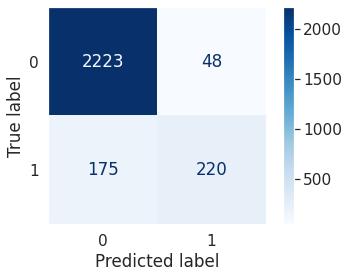

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y, allyp[i_best], cmap="Blues")
plt.grid(False)
plt.show()

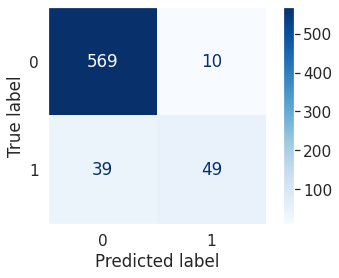

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(yt, yp, cmap="Blues")
plt.grid(False)
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y, allyp[i_best]))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2271
           1       0.82      0.56      0.66       395

    accuracy                           0.92      2666
   macro avg       0.87      0.77      0.81      2666
weighted avg       0.91      0.92      0.91      2666



In [28]:
from sklearn.metrics import classification_report
print(classification_report(yt, yp))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       579
           1       0.83      0.56      0.67        88

    accuracy                           0.93       667
   macro avg       0.88      0.77      0.81       667
weighted avg       0.92      0.93      0.92       667



In [29]:
file = open('PLS.py','w')
file.write('import numpy as np'+"\n")
file.write('from sklearn.cross_decomposition import PLSRegression'+"\n")
file.write('from sklearn.base import BaseEstimator, ClassifierMixin'+"\n")
file.write('class PLS(BaseEstimator, ClassifierMixin):'+"\n")
file.write('    def __init__(self):'+"\n")
file.write('        self.clf = PLSRegression(n_components=2)'+"\n")
file.write('    def fit(self, X, y):'+"\n")
file.write('        self.clf.fit(X,y)'+"\n")
file.write('        return self'+"\n")
file.write('    def predict(self, X):'+"\n")
file.write('        pr = [np.round(min(max(item[0],0),1)) for item in self.clf.predict(X)]'+"\n")
file.write('        return np.array(pr)'+"\n")
file.write('    def predict_proba(self, X):'+"\n")
file.write('        p_all = []'+"\n")
file.write('        p_all.append([1-min(max(item[0],0.0001),0.9999) for item in self.clf.predict(X)])'+"\n")
file.write('        p_all.append([min(max(item[0],0.0001),0.9999) for item in self.clf.predict(X)])'+"\n")
file.write('        return np.transpose(np.array(p_all))'+"\n")
file.close()

In [30]:
from PLS import PLS

In [31]:
from sklearn.model_selection import cross_val_predict
clf = PLS()
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y) / len(y)
train_acc

0.8555888972243061

In [32]:
from sklearn.ensemble import ExtraTreesClassifier

In [33]:
from sklearn.model_selection import cross_val_predict
param = [1,2,4,8,16,32]
allyp = [cross_val_predict(SVC(C=item,random_state=0), X, y, cv=5) for item in param]
train_acc = [sum(item==y)/len(y) for item in allyp]
i_best = np.argmax(train_acc)
best_param = param[i_best]
best_acc = train_acc[i_best]
print("Train Acc = " + str(best_acc) + ", C = "+ str(best_param))

Train Acc = 0.9163540885221305, C = 16


In [34]:
from sklearn.model_selection import cross_val_predict
param = [20, 50, 100, 200, 500]
allyp = [cross_val_predict(ExtraTreesClassifier(n_estimators=item,random_state=0), X, y, cv=5) for item in param]
train_acc = [sum(item==y)/len(y) for item in allyp]
i_best = np.argmax(train_acc)
best_param = param[i_best]
best_acc = train_acc[i_best]
print("Train Acc = " + str(best_acc) + ", C = "+ str(best_param))

Train Acc = 0.9294823705926482, C = 200


In [35]:
clf = ExtraTreesClassifier(n_estimators=200, random_state=0).fit(X,y)
yp = clf.predict(Xt)
test_acc = sum(yp==yt)/len(yt)
print("Test Acc = "+ str(test_acc))

Test Acc = 0.9250374812593704


In [36]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [37]:
train_acc

0.8510877719429858

In [38]:
test_acc

0.8440779610194903

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
param = [20, 50, 100, 200, 500]
allyp = [cross_val_predict(MLPClassifier(hidden_layer_sizes=(item,), random_state=0), X, y, cv=5) for item in param]
train_acc = [sum(item==y)/len(y) for item in allyp]
i_best = np.argmax(train_acc)
best_param = param[i_best]
best_acc = train_acc[i_best]
print("Train Acc = " + str(best_acc) + ", Hidden_Layers = "+ str(best_param))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

Train Acc = 0.9141035258814704, Hidden_Layers = 500


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [40]:
clf = MLPClassifier(hidden_layer_sizes=(500,), random_state=0).fit(X,y)
yp = clf.predict(Xt)
test_acc = sum(yp==yt)/len(yt)
print("Test Acc = " + str(test_acc))

Test Acc = 0.9250374812593704


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [41]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(n_estimators=200)
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [42]:
train_acc

0.9306076519129782

In [43]:
test_acc

0.9370314842578711

In [44]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(n_estimators=800, learning_rate=0.01)
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [45]:
train_acc

0.931357839459865

In [46]:
test_acc

0.9415292353823088

In [47]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(n_estimators=800, learning_rate=0.01, num_leaves=20 )
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [48]:
train_acc

0.9339834958739685

In [49]:
test_acc

0.9385307346326837

<h1> Churn Prediction</h1>

<h3> 1. Logistic Regression  </h3>


In [50]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [51]:
train_acc

0.8578394598649662

In [52]:
test_acc

0.8740629685157422

<h3> 2. Naive Bayes   </h3>

In [53]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [54]:
train_acc

0.8510877719429858

In [55]:
test_acc

0.8440779610194903

<h3> 3. Random Forest </h3>


In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=800,max_depth=2, random_state=0)
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [57]:
train_acc

0.8525881470367592

In [58]:
test_acc

0.8755622188905547

<h1> XGB Model </h1>

In [59]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=500, learning_rate=0.01) 
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [60]:
train_acc

0.9317329332333083

In [61]:
test_acc

0.9415292353823088

<h1> LGBM Model </h1>

In [62]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(n_estimators=500, learning_rate=0.01)
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [63]:
train_acc

0.932483120780195

In [64]:
test_acc

0.9430284857571214

<h3> lightgbm </h3>

In [65]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(n_estimators=800, learning_rate=0.01)
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [66]:
train_acc

0.931357839459865

In [67]:
test_acc

0.9415292353823088

<h3> KNeighbors </h3>

In [68]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=800)
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [69]:
train_acc

0.8518379594898725

In [70]:
test_acc

0.8680659670164917

<h3> DecisionTree </h3>

In [71]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [72]:
train_acc

0.8893473368342085

In [73]:
test_acc

0.8845577211394303

<h3> LogisticRegression </h3>

In [74]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=100,random_state=0)
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [75]:
train_acc

0.8563390847711928

In [76]:
test_acc

0.8725637181409296

<h3> ExtraTrees </h3>

In [77]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=800, random_state=0)
yp = cross_val_predict(clf, X, y, cv=5)
train_acc = sum(yp==y)/len(y) #Training Accuacy

clf.fit(X, y) # Train Model
yp = clf.predict(Xt) # Test Model
test_acc = sum(yp == yt)/len(yt) # Test Accuracy

In [78]:
train_acc

0.9306076519129782

In [79]:
test_acc

0.9295352323838081